In [1]:
#import pandas
import pandas as pd

#import numpy
import numpy as np

#import matplotib
import matplotlib.pyplot as plt

#import seaborn
import seaborn as sns

In [2]:
# load the file from local(system)
df_House_Rent_Dataset = pd.read_csv('House_Rent_Dataset.csv')

### DATA OVERVIEW

In [3]:
# show 5 observations of the data
df_House_Rent_Dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
# show 5 observations of the data
df_House_Rent_Dataset.tail()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [5]:
# chcek the shape of the data
df_House_Rent_Dataset.shape

#(obs,attributes)

(4746, 12)

**interpretation**
 - we have (4746) observations rows
  - we have 12 attributes columns

In [6]:
# show the basic info of the data
df_House_Rent_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


**interpretation**
 - we have total 4 numerical columns and 8 categorical columns
 - memory usage is 445.1+ KB that means we does not require extra resources
 - after observing the output and we can say missing records are not there in the data

In [7]:
# finding the percentage of missing records
df_House_Rent_Dataset.isnull().sum()/len(df_House_Rent_Dataset)*100

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

**Interpretation**
 - we don't have any null records in the data set

In [8]:
# justify the basic statistics of the data
df_House_Rent_Dataset.describe().T    #T is used to transpose

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [9]:
# check the count of null values present in data frame
df_House_Rent_Dataset.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [10]:
# perform authentic check
df_House_Rent_Dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [11]:
# CHECKING FOR NUMBER OF OUTLIERS IN EACH COLUMN (IQR rule)
def check_outliers_iqr(df):
    outlier_summary = {}
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
    return outlier_summary

outlier_counts = check_outliers_iqr(df_House_Rent_Dataset)
print(outlier_counts)

{'BHK': 27, 'Rent': 520, 'Size': 203, 'Bathroom': 232}


**interpretation**
 - we have outliers in the data

In [12]:
# segregate the data based on data type
df_num = df_House_Rent_Dataset.select_dtypes(include='number') #numerical data frame
df_cat =df_House_Rent_Dataset.select_dtypes(include='object') #chatagerical data frame

In [13]:
# check the columns present in categorical data frame
df_cat.columns

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [14]:
# check the columns present in categorical data frame
df_num.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [15]:
# show the first 5 observation of numerical data
df_num.head()

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1


## Data Pre-processing

## Outliners Remove

In [16]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    for col in df_clean.select_dtypes(include=['number']).columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within the bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Remove outliers from your dataset
df_no_outliers = remove_outliers_iqr(df_House_Rent_Dataset)

print("Shape before removing outliers:", df_House_Rent_Dataset.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (4746, 12)
Shape after removing outliers: (4078, 12)


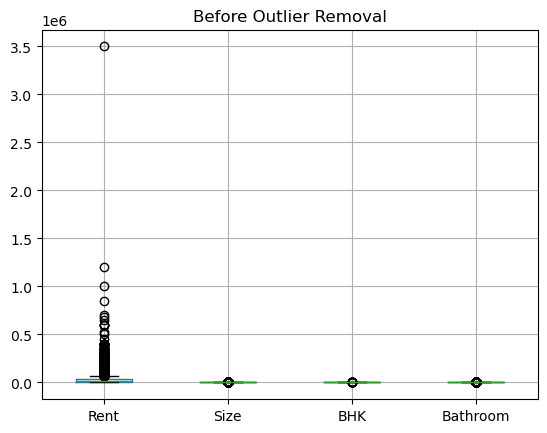

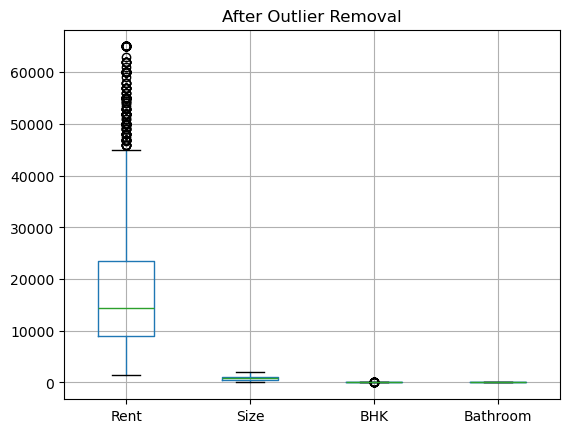

In [17]:
df_House_Rent_Dataset.boxplot(column=['Rent','Size','BHK','Bathroom'])
plt.title("Before Outlier Removal")
plt.show()

df_no_outliers.boxplot(column=['Rent','Size','BHK','Bathroom'])
plt.title("After Outlier Removal")
plt.show()


In [18]:
# show the 1st 5 obs of chatergorical data
df_cat.head()

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner


# EDA (Exploratory Data Analysis)

### Perform the Univariate Analysis on Numerical Data

In [19]:
# show the numerical colm
df_num.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

#### BHK

In [20]:
# show the minimum
df_num.BHK.min()

1

In [21]:
# show the maximum
df_num.BHK.max()

6

In [22]:
# show the average
res = df_num.BHK.mean()
print(f"mean is {res: .2f}")

mean is  2.08


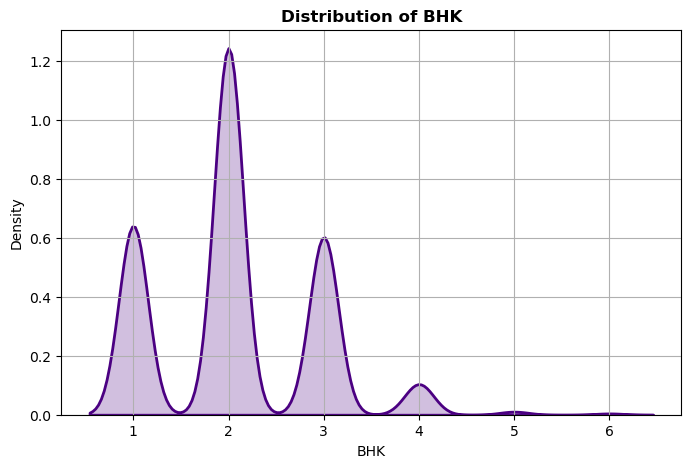

In [23]:
# Plot the distribution of the 'sales_volume' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df_num['BHK'], color='indigo', fill=True, linewidth=2)

# Formatting the plot
plt.grid()
plt.title("Distribution of BHK", fontsize=12, fontweight='bold')

# Show the plot
plt.show()

**interpretation**
- **Minimum BHK count is $\approx 0.5$**, suggesting the inclusion of smaller properties like studio apartments.
- **Maximum BHK count is $\approx 6.5$**, but properties with 5 or more bedrooms are extremely rare.
- The data follows a **multi-modal distribution** with distinct primary peaks at 1 BHK, 2 BHK, and 3 BHK.
- The **2 BHK** configuration is the **most common**, showing the highest density peak ($>1.2$).
- Secondary peaks are seen at **1 BHK** ($\approx 0.65$) and **3 BHK** ($\approx 0.60$), with a smaller, minor peak at 4 BHK ($\approx 0.1$).

### Rent

In [24]:
# show the minimum
df_num.Rent.min()

1200

In [25]:
# show the maximum
df_num.Rent.max()

3500000

In [26]:
res = df_num.Rent.mean()
print(f"mean is {res: .2f}")

mean is  34993.45


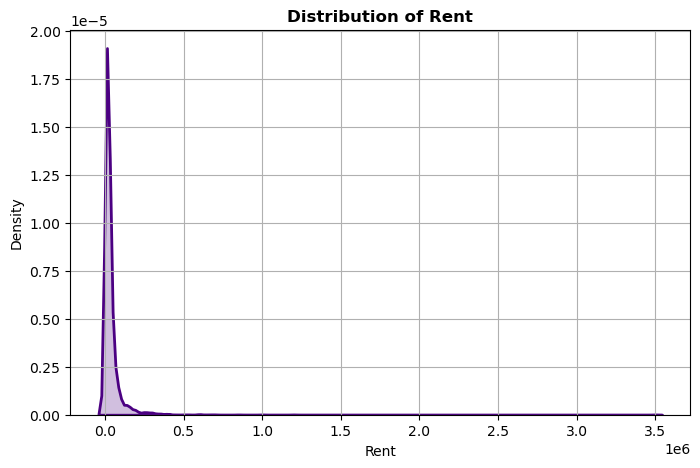

In [27]:
# Plot the distribution of the 'factory_dispatch' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df_num['Rent'], color='indigo', fill=True, linewidth=2)

# Formatting the plot
plt.grid()
plt.title("Distribution of Rent", fontsize=12, fontweight='bold')

# Show the plot
plt.show()


**Interpretation**
 - the graph looks unclear so swe need to perform actions to transform

In [28]:
Q1 = df_House_Rent_Dataset['Rent'].quantile(0.25)
Q3 = df_House_Rent_Dataset['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_House_Rent_Dataset[(df_House_Rent_Dataset['Rent'] < lower_bound) | (df_House_Rent_Dataset['Rent'] > upper_bound)]


In [29]:
df_House_Rent_Dataset['Rent_log'] = np.log1p(df_House_Rent_Dataset['Rent'])

In [30]:
df_House_Rent_Dataset['Rent_log'] = np.log1p(df_House_Rent_Dataset['Rent'])   # log(1 + Rent)


In [31]:
upper_cap = df_House_Rent_Dataset['Rent'].quantile(0.99)
df_House_Rent_Dataset['Rent_capped'] = np.where(df_House_Rent_Dataset['Rent'] > upper_cap, upper_cap, df_House_Rent_Dataset['Rent'])


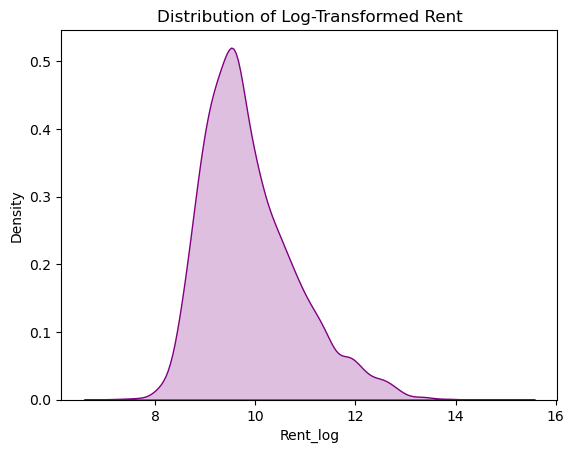

In [32]:
sns.kdeplot(df_House_Rent_Dataset['Rent_log'], fill=True, color="purple")
plt.title("Distribution of Log-Transformed Rent")
plt.show()


 **interpretation**:

- The distribution of the **log-transformed rent (Rent\_log)** is **unimodal**, centered around a peak value slightly less than 10.
- The shape is **right-skewed**, meaning the majority of the log-transformed rent values are concentrated on the lower end, with a long tail extending toward higher values (up to $\approx 14$).
- The **peak density is over 0.5**, indicating a strong concentration of data points just below the log-rent value of 10.
- The log-transformed rent ranges from approximately **8.0 to 14.0**, showing the spread of the data after transformation.
- The **log transformation was successful** in making the original (untransformed) rent distribution less skewed and closer to a normal distribution, though some right-skewness persists.

In [33]:
# Capping
upper_cap = df_House_Rent_Dataset['Rent'].quantile(0.99)
df_House_Rent_Dataset['Rent_capped'] = np.where(df_House_Rent_Dataset['Rent'] > upper_cap, upper_cap, df_House_Rent_Dataset['Rent'])

# Log transform
df_House_Rent_Dataset['Rent_log'] = np.log1p(df_House_Rent_Dataset['Rent_capped'])


### Size

In [34]:
# show the minimum
df_num.Size.min()

10

In [35]:
# show the minimum
df_num.Size.max()

8000

In [36]:
res = df_num.Size.mean()
print(f"mean is {res: .2f}")

mean is  967.49


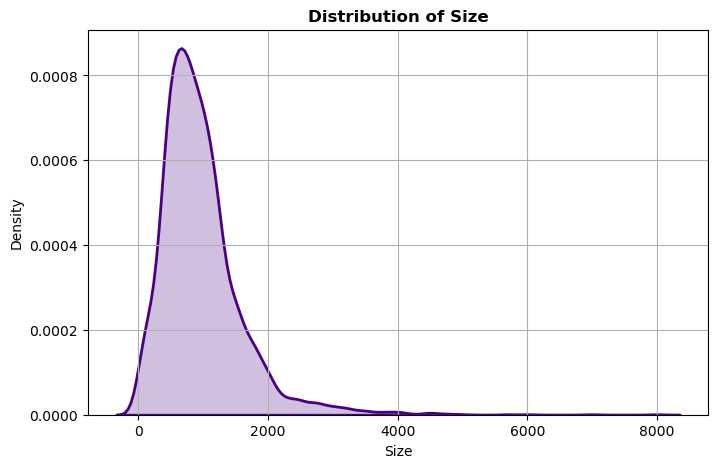

In [37]:
# Plot the distribution of the 'factory_dispatch' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df_num['Size'], color='indigo', fill=True, linewidth=2)

# Formatting the plot
plt.grid()
plt.title("Distribution of Size", fontsize=12, fontweight='bold')

# Show the plot
plt.show()

   **interpretation**:

- The distribution of **Size** is **highly unimodal** and **extremely right-skewed** (positively skewed).
- The vast majority of properties **cluster between 0 and 2000** (likely square units, e.g., sq ft), with the **peak density** occurring at a size of approximately **1000**.
- The **maximum density is very low** ($\approx 0.00085$), which is common for distributions of continuous variables like size.
- A **long, thin tail** extends towards the higher end of the size range, showing that very large properties (up to $\approx 8000$) exist but are **extremely rare**.
- This heavily skewed shape indicates that the **mean size** will be **significantly larger than the median size**.

### Bathroom

In [38]:
# show the minimum
df_num.Bathroom.min()


1

In [39]:
# show the minimum
df_num.Bathroom.max()

10

In [40]:
res = df_num.Bathroom.mean()
print(f"mean is {res: .2f}")

mean is  1.97


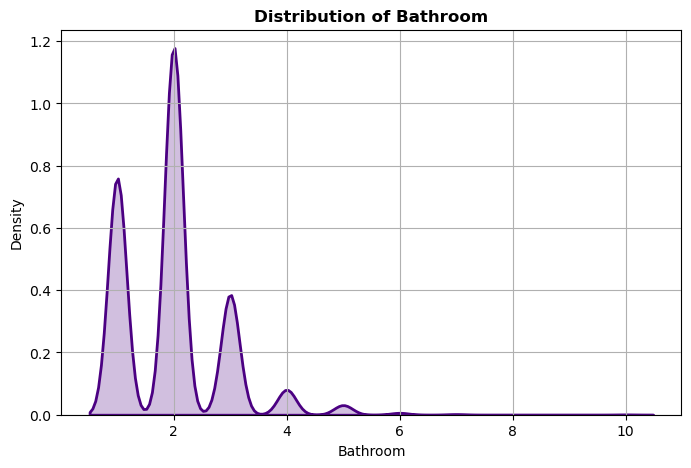

In [41]:
# Plot the distribution of the 'factory_dispatch' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df_num['Bathroom'], color='indigo', fill=True, linewidth=2)

# Formatting the plot
plt.grid()
plt.title("Distribution of Bathroom", fontsize=12, fontweight='bold')

# Show the plot
plt.show()

  **interpretation**:

- The distribution of **Bathroom** count is a **multi-modal distribution**, showing several distinct peaks.
- The **most common** number of bathrooms is **2**, which has the highest density peak ($\approx 1.18$).
- The second most common count is **1 bathroom** ($\approx 0.75$), followed by **3 bathrooms** ($\approx 0.40$).
- Minor peaks are also visible at **4 bathrooms** ($\approx 0.08$) and **5 bathrooms** ($\approx 0.03$), with counts of 6 and higher being **extremely rare** (density near zero).
- The majority of properties have between **1 and 3 bathrooms**.

In [42]:
# perform authentic check
df_House_Rent_Dataset.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'Rent_log', 'Rent_capped'],
      dtype='object')

### univariant ananlysis on cahterigical data


In [43]:
df_cat.columns

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

Posted on

In [44]:
df_cat.rename(columns={"Posted On": "Posted_On"}, inplace=True)

In [45]:
# load the file from local(system)
df_House_Rent_Dataset = pd.read_csv('House_Rent_Dataset.csv')

# segregate the data based on data type
df_cat =df_House_Rent_Dataset.select_dtypes(include='object') #chatagerical data frame

# Rename the 'Posted On' column
df_cat.rename(columns={"Posted On": "Posted_On"}, inplace=True)

# Display the updated columns of df_cat
print(df_cat.columns)

Index(['Posted_On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')


## bivariate analysis

In [46]:
df_House_Rent_Dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


df_num.corr()

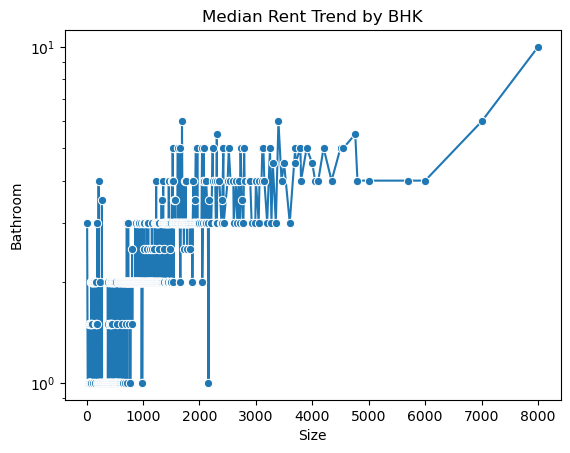

In [47]:
summary = df_num.groupby('Size')['Bathroom'].median().reset_index()
sns.lineplot(x='Size', y='Bathroom', data=summary, marker='o')
plt.yscale("log")
plt.title("Median Rent Trend by BHK")
plt.show()


In [48]:
Q1 = df_House_Rent_Dataset['Rent'].quantile(0.25)
Q3 = df_House_Rent_Dataset['Rent'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_House_Rent_Dataset[
    (df_House_Rent_Dataset['Rent'] < lower_bound) |
    (df_House_Rent_Dataset['Rent'] > upper_bound)
]


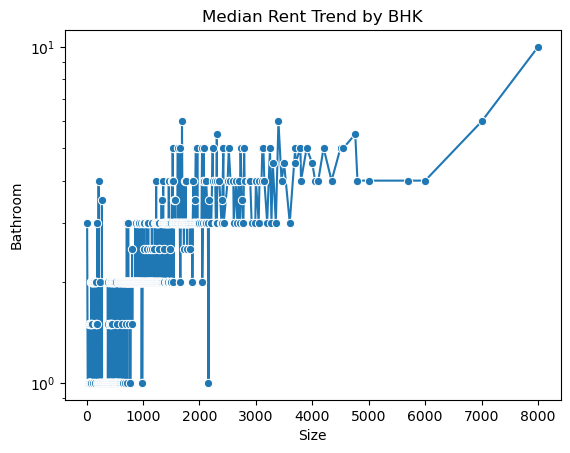

In [49]:
summary = df_num.groupby('Size')['Bathroom'].median().reset_index()
sns.lineplot(x='Size', y='Bathroom', data=summary, marker='o')
plt.yscale("log")
plt.title("Median Rent Trend by BHK")
plt.show()


In [50]:
# Ensure the column is in datetime format
df_cat['Posted_On'] = pd.to_datetime(df_cat['Posted_On'])

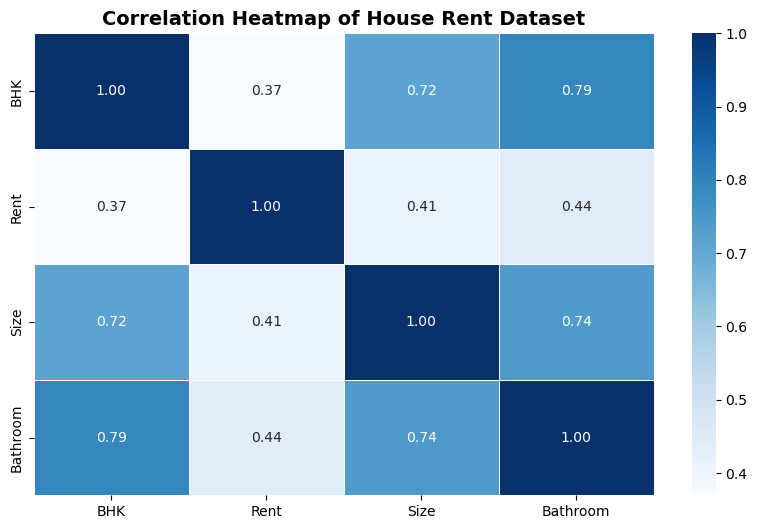

In [51]:
# Compute correlation matrix
corr = df_House_Rent_Dataset.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of House Rent Dataset", fontsize=14, fontweight='bold')
plt.show()

### Applying Feature Engineering and Transforming Posted On(date format) Columns into date,month,year,season.

In [52]:

# Extract day, month, year, weekday, quarter
df_cat['Day'] = df_cat['Posted_On'].dt.day
df_cat['Month'] = df_cat['Posted_On'].dt.month
df_cat['Year'] = df_cat['Posted_On'].dt.year
df_cat['Weekday'] = df_cat['Posted_On'].dt.day_name()
df_cat['Quarter'] = df_cat['Posted_On'].dt.quarter


In [53]:
# Ensure datetime
df_House_Rent_Dataset['Posted On'] = pd.to_datetime(df_House_Rent_Dataset['Posted On'])

# Extract parts of date
df_House_Rent_Dataset['Day'] = df_House_Rent_Dataset['Posted On'].dt.day
df_House_Rent_Dataset['Month'] = df_House_Rent_Dataset['Posted On'].dt.month
df_House_Rent_Dataset['Year'] = df_House_Rent_Dataset['Posted On'].dt.year
df_House_Rent_Dataset['Weekday'] = df_House_Rent_Dataset['Posted On'].dt.day_name()
df_House_Rent_Dataset['Quarter'] = df_House_Rent_Dataset['Posted On'].dt.quarter

# Season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_House_Rent_Dataset['Season'] = df_House_Rent_Dataset['Month'].apply(get_season)


In [54]:
df_cat.head()

,Posted_On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact,Day,Month,Year,Weekday,Quarter
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,18,5,2022,Wednesday,2
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,13,5,2022,Friday,2
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,16,5,2022,Monday,2
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,4,7,2022,Monday,3
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner,9,5,2022,Monday,2


In [55]:
# 1. Make sure 'Posted On' is in datetime format
df_House_Rent_Dataset['Posted On'] = pd.to_datetime(df_House_Rent_Dataset['Posted On'], errors='coerce')

# 2. Extract date parts
df_House_Rent_Dataset['Day'] = df_House_Rent_Dataset['Posted On'].dt.day
df_House_Rent_Dataset['Month'] = df_House_Rent_Dataset['Posted On'].dt.month
df_House_Rent_Dataset['Year'] = df_House_Rent_Dataset['Posted On'].dt.year
df_House_Rent_Dataset['Weekday'] = df_House_Rent_Dataset['Posted On'].dt.day_name()
df_House_Rent_Dataset['Quarter'] = df_House_Rent_Dataset['Posted On'].dt.quarter

# 3. Function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# 4. Apply season mapping
df_House_Rent_Dataset['Season'] = df_House_Rent_Dataset['Month'].apply(get_season)

df_House_Rent_Dataset[['Posted On', 'Day', 'Month', 'Year', 'Weekday', 'Quarter', 'Season']].head()


,Posted On,Day,Month,Year,Weekday,Quarter,Season
0,2022-05-18,18,5,2022,Wednesday,2,Spring
1,2022-05-13,13,5,2022,Friday,2,Spring
2,2022-05-16,16,5,2022,Monday,2,Spring
3,2022-07-04,4,7,2022,Monday,3,Summer
4,2022-05-09,9,5,2022,Monday,2,Spring


In [56]:
df_cat.head()

,Posted_On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact,Day,Month,Year,Weekday,Quarter
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,18,5,2022,Wednesday,2
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,13,5,2022,Friday,2
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,16,5,2022,Monday,2
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,4,7,2022,Monday,3
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner,9,5,2022,Monday,2


In [57]:
df_House_Rent_Dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month,Year,Weekday,Quarter,Season
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,18,5,2022,Wednesday,2,Spring
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,13,5,2022,Friday,2,Spring
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,16,5,2022,Monday,2,Spring
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,7,2022,Monday,3,Summer
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,5,2022,Monday,2,Spring


### specifying target variable to perform machine learning in them

In [58]:
# after discussion we decided to take salary as our target variable(dependent variable)
target = df_House_Rent_Dataset.Rent

# after storing this variable into target we have to remove it from the main data frame.(independent variable)
df_House_Rent_Dataset = df_House_Rent_Dataset.drop('Rent',axis=1)

## prepare the data for machine learning

# perform encoding(one hot encoding)


In [59]:
df_encodded = pd.get_dummies(df_cat)

In [60]:
df_encodded.head()

,Posted_On,Day,Month,Year,Quarter,Floor_1,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,...,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,2022-05-18,18,5,2022,2,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2022-05-13,13,5,2022,2,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,2022-05-16,16,5,2022,2,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,2022-07-04,4,7,2022,3,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
4,2022-05-09,9,5,2022,2,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


### scale the numerical variables

In [61]:
# import the standerd scalar subpackage for performing the scalling
from sklearn.preprocessing import StandardScaler

In [62]:
# intialize the standerd scalar
ss = StandardScaler() #intiasation

In [63]:
# transform the numerical variables
Scale=ss.fit_transform(df_num)
# check the transform data
#Scale

In [64]:
# create the new data frame for scaled data
df_Scale=pd.DataFrame(Scale,columns=df_num.columns)

In [65]:
# check the scaled data frame
df_Scale.head()

,BHK,Rent,Size,Bathroom
0,-0.100773,-0.320026,0.208960,0.038594
1,-0.100773,-0.191982,-0.264125,-1.092067
2,-0.100773,-0.230395,0.051265,-1.092067
3,-0.100773,-0.320026,-0.264125,-1.092067
4,-0.100773,-0.352037,-0.185277,-1.092067


### perform concatinate bith the encodded and scaled data frame


In [66]:
# do the concatination
X = pd.concat([df_encodded , df_Scale],axis=1)
#chck the concatinate data
X.head()

,Posted_On,Day,Month,Year,Quarter,Floor_1,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,...,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,BHK,Rent,Size,Bathroom
0,2022-05-18,18,5,2022,2,False,False,False,False,False,...,False,False,False,False,False,True,-0.100773,-0.320026,0.208960,0.038594
1,2022-05-13,13,5,2022,2,False,False,False,False,False,...,False,False,False,False,False,False,-0.100773,-0.191982,-0.264125,-1.092067
2,2022-05-16,16,5,2022,2,False,False,False,False,False,...,True,False,False,False,False,False,-0.100773,-0.230395,0.051265,-1.092067
3,2022-07-04,4,7,2022,3,False,False,False,False,False,...,True,False,False,False,False,False,-0.100773,-0.320026,-0.264125,-1.092067
4,2022-05-09,9,5,2022,2,False,False,False,False,False,...,True,False,False,False,False,False,-0.100773,-0.352037,-0.185277,-1.092067


## Now split the data in training set and testing set

In [67]:
# import the trained test split
from sklearn.model_selection import train_test_split

In [68]:
# create xtrain,xtest, ytrain, ytest
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.20,random_state=42)

In [69]:
# Authentic chcek training set
print(X_train.shape)

print(y_train.shape)

(3796, 2749)
(3796,)


In [70]:
# Authentic check for testing set
print(X_test.shape)

print(y_test.shape)

(950, 2749)
(950,)


## Find the base ml algorithm

### Linear Regression

In [71]:
# import linear regression algorithm and evaluation matrix.
from sklearn.linear_model import LinearRegression

# here we are using MSE as evaluation matrix
from sklearn.metrics import mean_squared_error

In [72]:
# Create a linear regression model
model = LinearRegression() #modelinitialisation

In [73]:
print(X_train.dtypes)


Posted_On            datetime64[ns]
Day                           int32
Month                         int32
Year                          int32
Quarter                       int32
                          ...      
Weekday_Wednesday              bool
BHK                         float64
Rent                        float64
Size                        float64
Bathroom                    float64
Length: 2749, dtype: object


In [74]:
print(X_train.columns)


Index(['Posted_On', 'Day', 'Month', 'Year', 'Quarter', 'Floor_1',
       'Floor_1 out of 1', 'Floor_1 out of 10', 'Floor_1 out of 11',
       'Floor_1 out of 12',
       ...
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday', 'BHK',
       'Rent', 'Size', 'Bathroom'],
      dtype='object', length=2749)


In [75]:
X_train['year'] = X_train['Posted_On'].dt.year
X_train['month'] = X_train['Posted_On'].dt.month
X_train['day'] = X_train['Posted_On'].dt.day
X_train['weekday'] = X_train['Posted_On'].dt.weekday
X_train = X_train.drop('Posted_On', axis=1)

In [76]:
X_test['year'] = X_test['Posted_On'].dt.year
X_test['month'] = X_test['Posted_On'].dt.month
X_test['day'] = X_test['Posted_On'].dt.day
X_test['weekday'] = X_test['Posted_On'].dt.weekday
X_test = X_test.drop('Posted_On', axis=1)


In [77]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns (important!)
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)


In [78]:
print(X_train.dtypes)  # should show only int/float


Day           int32
Month         int32
Year          int32
Quarter       int32
Floor_1        bool
             ...   
Bathroom    float64
year          int32
month         int32
day           int32
weekday       int32
Length: 2752, dtype: object


In [79]:
from sklearn.linear_model import LinearRegression

# Train your linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Make sure X_train and y_train are properly defined

# Use lr_model (not model) for predictions
predictions = lr_model.predict(X_test)  # Changed 'model' to 'lr_model'

# Now save it
import joblib
joblib.dump(lr_model, "linear_regression_model.pkl")

['linear_regression_model.pkl']

In [80]:
# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 6.006699038167241e-19


### Random Forest Regressor

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, X_test, y_train, y_test are already defined from train_test_split

# Create a Random Forest regression model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
forest_model.fit(X_train, y_train)

# Predict on the testing data
predictions = forest_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 170691346.51905715


### The lower cell code is our older code




from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

1. Define the base model
rf = RandomForestRegressor(random_state=42)

2. Define RFE - you can set n_features_to_select to a specific number
n_features = 20  # Adjust this number based on how many features you want
rfe = RFE(estimator=rf, n_features_to_select=n_features,step=0.1)

3. Fit RFE on the training data
rfe.fit(X_train, y_train)

4. Transform the datasets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

5. Train the model again using selected features
rf.fit(X_train_rfe, y_train)

6. Predict and evaluate
y_pred = rf.predict(X_test_rfe)

7. Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Selected Features: {rfe.support_}")
print(f"Feature Ranking: {rfe.ranking_}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

In [82]:
# Single-cell fast alternative to RFE using RandomForest feature importances
# It selects the top `n_features` by importance, retrains, and evaluates.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# --- User-tuneable ---
n_features = 100   # number of top features to keep
n_estimators = 200 # number of trees (increase for stability, reduce for speed)
random_state = 42

# --- Setup model (uses all cores) ---
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)

# --- Fit on full feature set to get importances ---
rf.fit(X_train, y_train)

# --- Get importances and select top features ---
importances = rf.feature_importances_

# If X_train is a DataFrame, preserve column names; else create generic names
if isinstance(X_train, pd.DataFrame):
    cols = X_train.columns
else:
    cols = np.array([f"f{i}" for i in range(X_train.shape[1])])

# Determine top indices (handles case if n_features > available features)
top_k = min(n_features, X_train.shape[1])
top_idx = np.argsort(importances)[::-1][:top_k]
top_columns = cols[top_idx]

# --- Create reduced datasets ---
# If pandas, keep DataFrame shape and names; otherwise use numpy arrays
if isinstance(X_train, pd.DataFrame):
    X_train_sel = X_train.iloc[:, top_idx]
    X_test_sel  = X_test.iloc[:, top_idx]
else:
    X_train_sel = X_train[:, top_idx]
    X_test_sel  = X_test[:, top_idx]

# --- Retrain a fresh RandomForest on selected features ---
rf_sel = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, n_jobs=-1)
rf_sel.fit(X_train_sel, y_train)

# --- Predict & Evaluate ---
y_pred = rf_sel.predict(X_test_sel)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

# --- Output summary ---
print(f"Selected top {top_k} features:")
print(list(top_columns))
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Selected top 100 features:
['Rent', 'Area Locality_Marathahalli', 'Area Locality_Raheja Artesia, Worli', 'Floor_18 out of 45', 'Tenant Preferred_Family', 'Size', 'Floor_2 out of 4', 'Area Locality_Breach Candy', 'Month', 'Bathroom', 'weekday', 'day', 'Day', 'Weekday_Wednesday', 'Weekday_Saturday', 'Tenant Preferred_Bachelors/Family', 'BHK', 'Furnishing Status_Semi-Furnished', 'Furnishing Status_Furnished', 'Floor_4 out of 6', 'Area Locality_Khar West', 'month', 'Area Locality_Bandra West', 'Area Locality_Anand Niketan', 'City_Delhi', 'Floor_2 out of 5', 'Weekday_Thursday', 'Area Locality_Lady Ratan Tower, Worli', 'Floor_3 out of 4', 'Area Locality_Altamount Road', 'City_Mumbai', 'Floor_24 out of 24', 'Quarter', 'Weekday_Tuesday', 'Floor_8 out of 10', 'Tenant Preferred_Bachelors', 'Weekday_Monday', 'Area Locality_Bandra East', 'Weekday_Friday', 'Floor_50 out of 75', 'Area Locality_Omkar 1973, Worli', 'Area Locality_Vettuvankeni', 'Furnishing Status_Unfurnished', 'City_Chennai', 'Floor_1

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Define base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Use randomized parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3)
}

# Define KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# RandomizedSearchCV (faster than GridSearch)
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # fewer combinations → faster
    scoring='neg_mean_squared_error',
    cv=kfold,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
search.fit(X_train, y_train)

# Best model and evaluation
best_model = search.best_estimator_
print("Best hyperparameters:", search.best_params_)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 51}
Test MSE: 186347028.70369714


In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Hyperparameter distribution for random search
param_dist = {
    'n_estimators': [50, 100, 150],         # fewer trees
    'max_depth': [None, 10, 20],           # limited depth options
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3-fold CV for speed
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Randomized search with 10 iterations
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                # number of random combinations to try
    scoring='neg_mean_squared_error',
    cv=kfold,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best model & evaluation
best_model = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

# Predict and calculate MSE
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Test MSE: 167174688.5667699


In [85]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# ✅ 1. Use a pipeline to scale features (SVR is sensitive to scale)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

# ✅ 2. Narrow and log-based hyperparameter ranges (reduces computation)
param_dist = {
    'svr__C': np.logspace(-1, 2, 4),            # 0.1, 1, 10, 100
    'svr__epsilon': [0.05, 0.1, 0.2],           # smaller set
    'svr__gamma': ['scale', 0.01, 0.1]          # fewer gamma options
}

# ✅ 3. Use 2-fold CV instead of 3-fold for faster testing
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# ✅ 4. Reduce iterations & parallelize
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=6,                            # fewer combinations
    scoring='neg_mean_squared_error',
    cv=kfold,
    n_jobs=-1,                           # parallel computation
    verbose=1,
    random_state=42
)

# ✅ 5. Fit to training data
print("Fitting optimized SVR RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# ✅ 6. Evaluate best model
best_model = random_search.best_estimator_
print("\nBest Hyperparameters:", random_search.best_params_)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nOptimized SVR Test MSE: {mse:.4f}")
print(f"Optimized SVR R² Score: {r2:.4f}")


Fitting optimized SVR RandomizedSearchCV...
Fitting 2 folds for each of 6 candidates, totalling 12 fits

Best Hyperparameters: {'svr__gamma': 'scale', 'svr__epsilon': 0.1, 'svr__C': np.float64(100.0)}

Optimized SVR Test MSE: 4287832697.6065
Optimized SVR R² Score: -0.0759


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Train SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)


SVR()

In [87]:
import joblib

# Save trained models
joblib.dump(forest_model, "random_forest_model.pkl")
joblib.dump(lr_model, "linear_regression_model.pkl")
joblib.dump(svr_model, "svr_model.pkl")

# (Optional) Save preprocessing pipeline if used
# joblib.dump(preprocessor, "preprocessor.pkl")

print("✅ Models saved successfully in Colab runtime!")


✅ Models saved successfully in Colab runtime!


In [88]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

## **conclusion**
The most promising and reliable initial result comes from the Random Forest

Regressor model trained on the top 100 features, which achieved a very high R^2score of 0.9549.


The conclusion is that the price of the house (Rent) can be predicted with a high degree of accuracy (over 95%) using a subset of key features from the dataset. The significant improvement in the Random Forest Regressor's R-squared suggests that the engineered and cleaned features contain strong predictive signals for the rental price.

#### Alternative: The Random Forest model is highly successful, explaining over 95% of the variability in the rental price. This level of accuracy confirms that we have the right data and a good predictive starting point to accurately estimate house rental values.

In [91]:
import joblib

# Save trained models
joblib.dump(forest_model, "random_forest_model.pkl")
joblib.dump(lr_model, "linear_regression_model.pkl")
joblib.dump(svr_model, "svr_model.pkl")

# (Optional) Save preprocessing pipeline if used
# joblib.dump(preprocessor, "preprocessor.pkl")

print("✅ Models saved successfully in Colab runtime!")


✅ Models saved successfully in Colab runtime!
